In [1]:
import torch
import matplotlib.pyplot as plt


In [2]:
x = torch.linspace(-3,3,101)


def nOutputx(actfun):
    actfun = getattr(torch,actfun)
    return actfun(x)



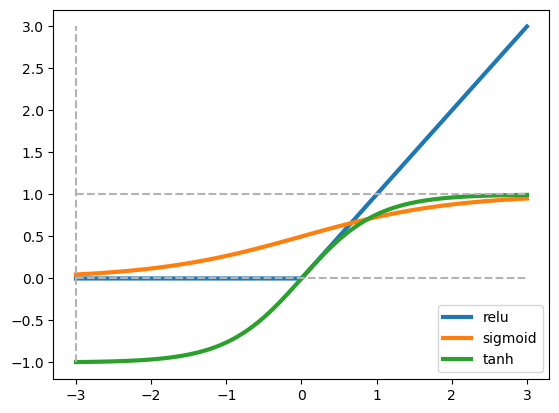

In [11]:
act_funs = ["relu", "sigmoid","tanh"]

for actfun in act_funs:
    plt.plot(x,nOutputx(actfun),label=actfun,linewidth=3)
dashlinecol = [.7,.7,.7]
plt.plot(x[[0,-1]],[0,0],"--",color=dashlinecol)
plt.plot(x[[0,-1]],[1,1],"--",color=dashlinecol)
plt.plot(x[[0,0]],[-1,3],"--",color=dashlinecol)
plt.legend()
plt.show()

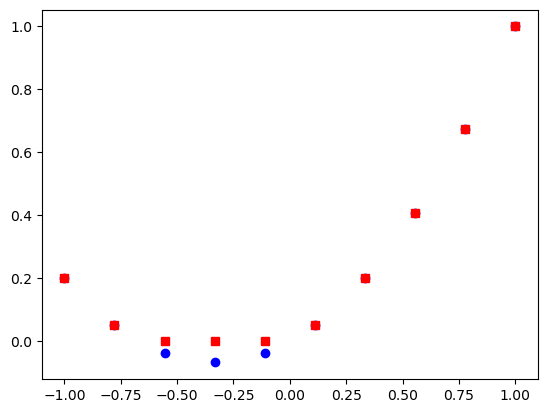

In [15]:
x = torch.linspace(-1,1,10)
x2 = x**2
w1 = .4
w2 = .6
linpart = x*w1 + x2*w2

y = torch.relu(linpart)

plt.plot(x,linpart,"bo")
plt.plot(x,y,"rs")
plt.show()

In [1]:
import torch
from torch.utils.data import DataLoader,TensorDataset
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
import torch.nn as nn
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as  stats

In [2]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv"
data = pd.read_csv(url,sep=";")

In [3]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [4]:
 for i in data.keys():
     print(f" column {i} has {len(np.unique(data[i]))} unique values")

 column fixed acidity has 96 unique values
 column volatile acidity has 143 unique values
 column citric acid has 80 unique values
 column residual sugar has 91 unique values
 column chlorides has 153 unique values
 column free sulfur dioxide has 60 unique values
 column total sulfur dioxide has 144 unique values
 column density has 436 unique values
 column pH has 89 unique values
 column sulphates has 96 unique values
 column alcohol has 65 unique values
 column quality has 6 unique values


A:\conda\envs\newdeep\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
A:\conda\envs\newdeep\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
A:\conda\envs\newdeep\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
A:\conda\envs\newdeep\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dty

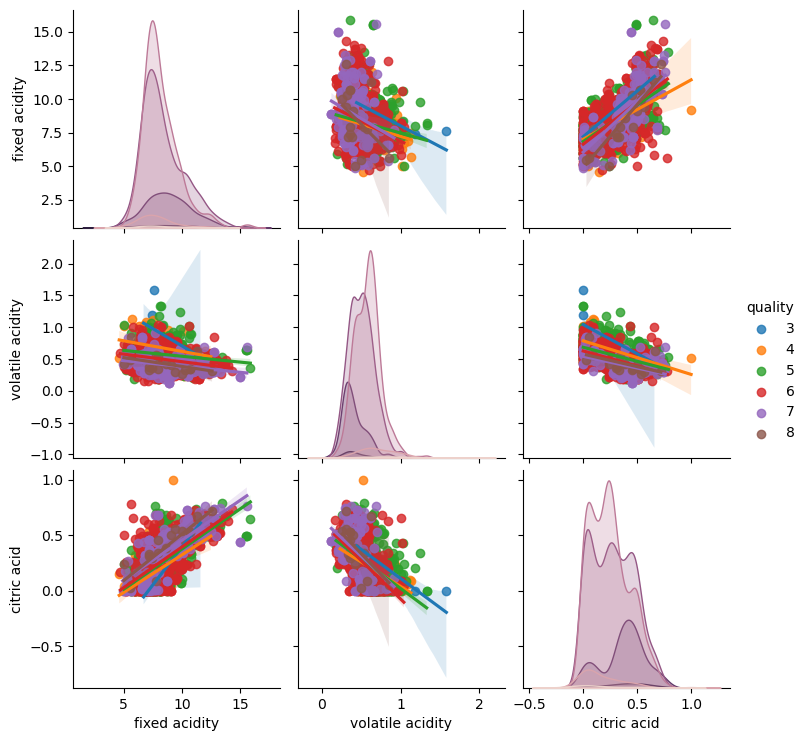

In [5]:
columnsToPlot = ['fixed acidity','volatile acidity','citric acid','quality']
sns.pairplot(data[columnsToPlot],kind='reg',hue='quality')

In [6]:
data = data[data['total sulfur dioxide']  <200]
columnsToZscore = data.keys()
columnsToZscore = columnsToZscore.drop('quality')
data[columnsToZscore] = data[columnsToZscore].apply(stats.zscore)
data['boolQuality'] = 0

data['boolQuality'] [data['quality'] > 5] = 1

data[['quality','boolQuality']]

C:\Users\M-Ali\AppData\Local\Temp\ipykernel_8640\1973829820.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['boolQuality'] [data['quality'] > 5] = 1


,quality,boolQuality
0,5,0
1,5,0
2,5,0
3,6,1
4,5,0
...,...,...
1594,5,0
1595,6,1
1596,6,1
1597,5,0


In [7]:
dataT = torch.tensor(data[columnsToZscore].values).float()
labelsT = torch.tensor(data['boolQuality'].values).float()
labels = labelsT[:,None]

In [8]:
train_data, test_data, train_labels, test_labels = train_test_split(dataT,labels,test_size=0.2)

trainData = TensorDataset(train_data,train_labels)
testData = TensorDataset(test_data,test_labels)

batchsize = 32

train_loader = DataLoader(trainData,batch_size=batchsize,shuffle=True,drop_last=True)
test_loader = DataLoader(testData,batch_size=trainData.tensors[0].shape[0])

In [9]:
class AllWine(nn.Module):
    def __init__(self,actfun):
        super().__init__()
        self.input = nn.Linear(11,16)

        self.fc1 = nn.Linear(16, 32)
        self.fc2 = nn.Linear(32, 32)

        self.output = nn.Linear(32, 1)
        self.actfun = actfun
    def forward(self,x):
        actfun = getattr(torch,self.actfun)
        x = actfun(self.input(x))
        x = actfun(self.fc1((x)))
        x = actfun(self.fc2(x))
        return self.output(x)
        

In [10]:
net = AllWine("sigmoid")
net(torch.randn(10,11)).shape

torch.Size([10, 1])

In [11]:
NumEpochs = 1000
def trainTheModel():
    lossfun = nn.BCEWithLogitsLoss()
    optimizer = torch.optim.SGD(wineNet.parameters(),lr = .01)

    losses = torch.zeros(NumEpochs)
    trainAcc = []
    testAcc = []

    for epoch in range(NumEpochs):
        wineNet.train()

        batchAcc = []
        batchLoss = []

        for X,y in train_loader:
            yhat = wineNet(X)
            loss = lossfun(yhat,y)

            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            batchLoss.append(loss.item())
            batchAcc.append( 100 * torch.mean(((yhat > 0) == y).float()).item())
            
        trainAcc.append(np.mean(batchAcc))
        losses[epoch]= np.mean(batchLoss)


        wineNet.eval()
        X,y = next(iter(test_loader))
        with torch.no_grad():
            yhat = wineNet(X)
        testAcc.append(100 * torch.mean(((yhat > 0) == y).float()).item())
    return trainAcc,testAcc, losses

In [15]:
activation_funs = ["relu", "sigmoid", 'tanh']

trainaccbyact = np.zeros((NumEpochs,len(activation_funs)))
testaccbyact = np.zeros((NumEpochs,len(activation_funs)))

for ai, actfun in enumerate(activation_funs):
    wineNet = AllWine(actfun)
    trainaccbyact [:,ai],testaccbyact[:,ai],losses = trainTheModel()

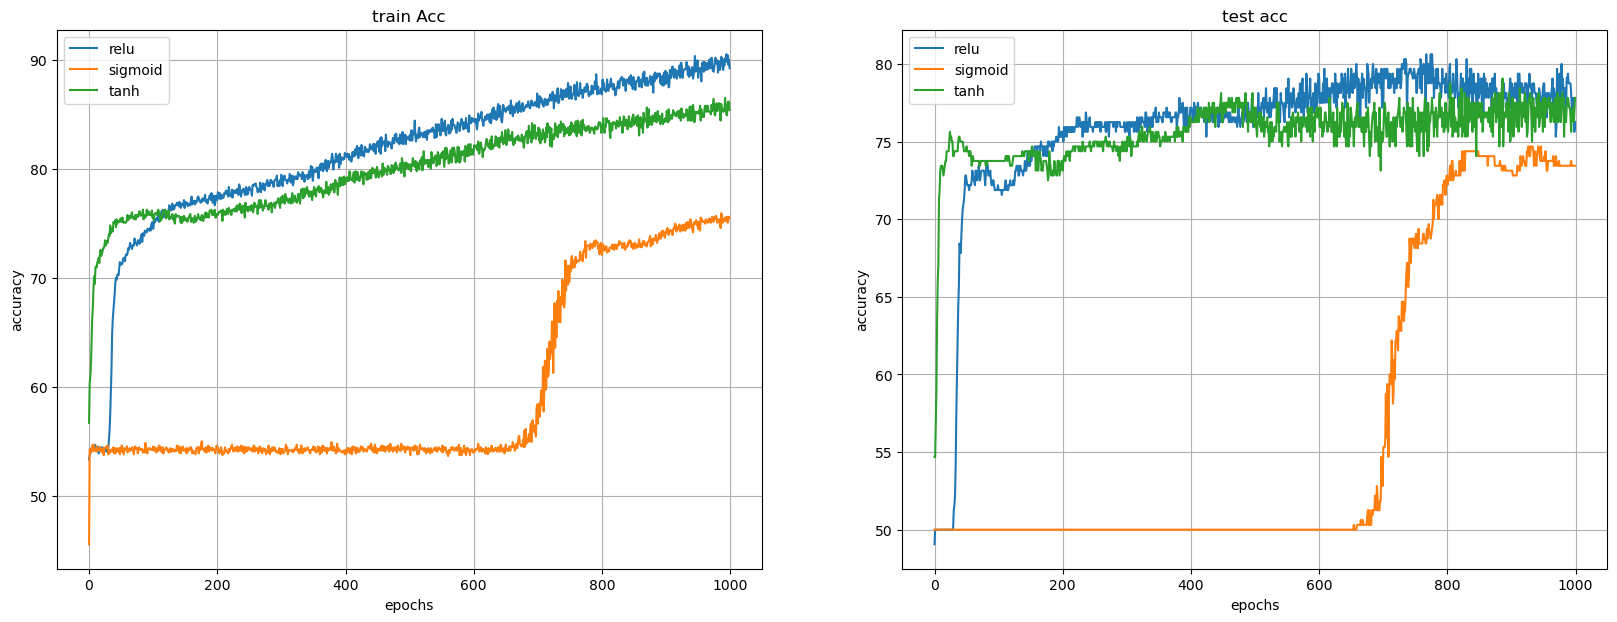

In [17]:
fig,axs = plt.subplots(1,2,figsize= (20,7))

axs[0].plot(trainaccbyact)
axs[0].set_title("train Acc")
axs[1].plot(testaccbyact)
axs[1].set_title("test acc")

for i in range(2):
    axs[i].legend(activation_funs)
    axs[i].set_xlabel("epochs")
    axs[i].set_ylabel("accuracy")
    axs[i].grid()
plt.show()